# Classification by Decision Tree

![](banner_decision_tree.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
                     
update_geom_defaults("point", list(size=3, colour=PALETTE[3]))
update_geom_defaults("segment",    list(size=0.5, colour="black"))

== document setup ==

## Introduction

Motivation, context, history, related topics ...

## Synopsis

The decision tree method is used to build a classification model.  The form of the model is a decision tree, where each non-terminal node of the tree represents a decision based on variable values to go left or right to the node at the next level down, and each terminal node indicates the probability of an observation being in a certain class.

There is also a version of the decision tree method to build a regression model.

**Terms**

* Prior probability
* Decision tree
* Node
* Root node
* Leaf node or terminal node

## Exposition

### Data

Consider this dataset and new observation.

x1,x2,class
2,5,B
1,2,A
6,4,A
7,5,A
8,1,A
11,2,B
12,5,A
14,2,A
15,1,B
13,1,B


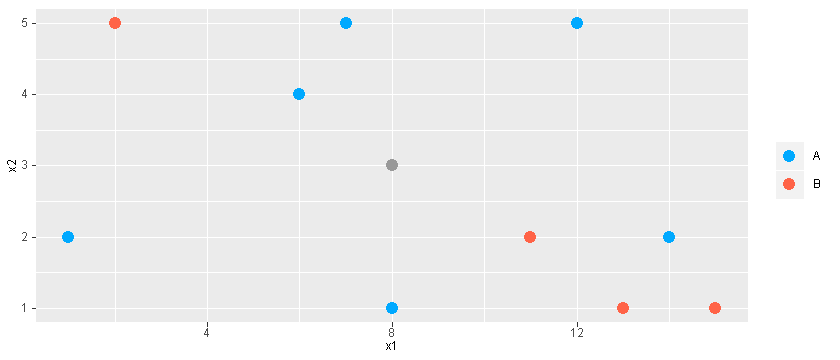

In [2]:
data = data.frame(x1=c(2,1,6,7,8,11,12,14,15,13), x2=c(5,2,4,5,1,2,5,2,1,1),
                  class=c("B","A","A","A","A","B","A","A","B","B"))
new = data.frame(x1=8, x2=3)
row.arrange(data %>% captionx, new %>% captionx)

ggplot(data) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), color=NEW_COLOR, data=new)

### Prediction Based on Prior Probabilities of Dataset

You can predict the new observation's class based on prior probabilities.  Doing so, you would predict the class that appears in the dataset with probability that exceeds some cutoff, regardless of the new observation.

In this example, class A appears with probability 0.60 and class B appears with probability 0.40.  Assuming a cutoff 0.50, we predict the new observation is in class A because 0.60 ≥ 0.50. 

In [3]:
prob_info  = data.frame(table(data$class));  names(prob_info)  = c("class", "prob"); prob_info$prob  = prob_info$prob/sum(prob_info$prob)

row.arrange(prob_info %>% captionx, cbind(new, class.predicted="A") %>% captionx("new"))

prob_info 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.6 
 
 
 B 
 0.4 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted 
 
 
 
 
 8 
 3 
 A

### Prediction Based on Prior Probabilities of Split Dataset

You can instead first split the dataset into two subsets - call them the left split and the right split - and then predict the new observation's class based on the prior probabilities of just one of the splits.  To split the dataset, pick a variable/value pair to serve as the split criterion for which of its observations go in the left split and which go in the right split.  To predict, apply the split criterion to the new observation and choose the left or right split accordingly. 

In this example, we pick x1=9.5 as our split criterion.  The dataset's 5 observations with x1 < 9.5 go in the left split, and the other 5 observations go in the right split.  For the left split, class A appears with probability 0.8 and class B appears with probability 0.2.  For the right split, class A appears with probability 0.4 and class B appers with probability 0.6.   

In [4]:
split_variable = "x1"
split_value = 9.5

data.left  = data[data[, split_variable] <   split_value,]
data.right = data[data[, split_variable] >=  split_value,]

prob_info.left  = data.frame(table(data.left$class));  names(prob_info.left)  = c("class", "prob"); prob_info.left$prob  = prob_info.left$prob/sum(prob_info.left$prob)
prob_info.right = data.frame(table(data.right$class)); names(prob_info.right) = c("class", "prob"); prob_info.right$prob = prob_info.right$prob/sum(prob_info.right$prob)

data.frame(split_variable, split_value)
row.arrange(data.left  %>% captionx, prob_info.left %>% captionx)
row.arrange(data.right %>% captionx, prob_info.right %>% captionx)

split_variable,split_value
x1,9.5


data.left 
 
 
 x1 
 x2 
 class 
 
 
 
 
 2 
 5 
 B 
 
 
 1 
 2 
 A 
 
 
 6 
 4 
 A 
 
 
 7 
 5 
 A 
 
 
 8 
 1 
 A 
 
 
 
 prob_info.left 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.8 
 
 
 B 
 0.2

data.right 
 
 
 x1 
 x2 
 class 
 
 
 
 
 11 
 2 
 B 
 
 
 12 
 5 
 A 
 
 
 14 
 2 
 A 
 
 
 15 
 1 
 B 
 
 
 13 
 1 
 B 
 
 
 
 prob_info.right 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.4 
 
 
 B 
 0.6

We can visualize this arrangement of the dataset as a tree diagram.  The tree's root node shows the split criterion.  The left branch represents the left split and its leaf node shows its majority class.  Similarly, the right branch represents the right split and its leaf node shows its majority class. 

n= 10 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 10 4 A (0.6000000 0.4000000)  
  2) x1< 9.5 5 1 A (0.8000000 0.2000000) *
  3) x1>=9.5 5 2 B (0.4000000 0.6000000) *

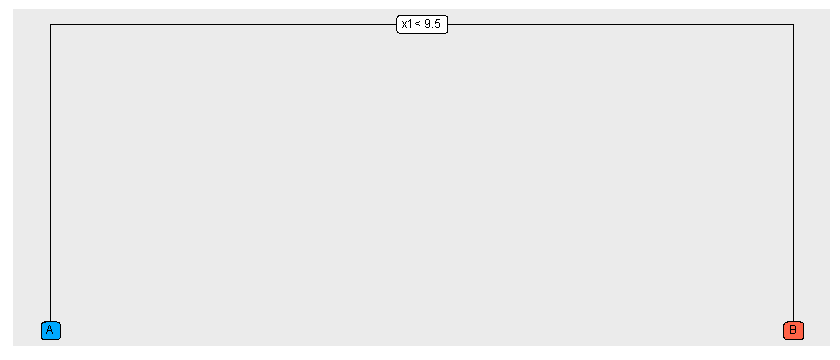

In [5]:
model.depth1 = rpart(class ~ x1+x2, data, method="class", minsplit=2, cp=0, maxdepth=1)

model.depth1
ggtree(model.depth1)

Applying the split criterion x1 < 9.5 to the new observation [ x1=8, x2=3 ], we see that 8 < 9.5 so we choose the left split.  Class A appears in the left split with probability 0.80 and class B appears with probability 0.20.  Assuming a 0.50 cutoff, we predict that the new observation is in class A because 0.80 ≥ 0.50.  (Note that we predict with 80% certainty rather than with 60% certainty as before, at least according to this particular method.)

In [6]:
prob_info  = data.frame(table(data.left$class));  names(prob_info)  = c("class", "prob"); prob_info$prob  = prob_info$prob/sum(prob_info$prob)

row.arrange(prob_info %>% captionx, cbind(new, class.predicted="A") %>% captionx("new"))

prob_info 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.8 
 
 
 B 
 0.2 
 
 
 
 new 
 
 
 x1 
 x2 
 class.predicted 
 
 
 
 
 8 
 3 
 A

### Prediction Based on Prior Probabilities of Recursively Split Dataset

You can extend the notion of splitting the dataset to also split the splits, and split those resulting splits, and keep splitting recursively to the point where each terminal split comprises observations of a single class.

This arrangement is called a decision tree model.  The dataset and its split criterion is called the root node of the tree.  Splits and their split criteria are called nodes.  Terminal splits are called leaf nodes or terminal nodes.

In this example, we pick x1 < 9.5 as our first split criterion.  For the left split, we pick x1 ≥ 4 as our split criterion.  For the right split, we pick x2 ≥ 1.5 as our split criterion.  We then further split the left and right splits, picking split criteria along the way, resulting in these 6 terminal splits:

* 3 observations in class A with (x1 < 9.5) & (x1 ≥ 4)
* 1 observation in class A with (x1 < 9.5) & (x1 < 4) & (x1 < 1.5), i.e., (x1 < 1.5)
* 1 observation in class B with (x1 < 9.5) & (x1 < 4) & (x1 ≥ 1.5), i.e., (x1 < 4) & (x1 ≥ 1.5)
* 2 observations in class A with (x1 ≥ 9.5) & (x2 ≥ 1.5) & (x1 ≥ 11.5), i.e., (x1 ≥ 11.5) & (x2 ≥ 1.5)
* 1 observation in class B with (x1 ≥ 9.5) & (x2 ≥ 1.5) & (x1 < 11.5)
* 2 observations in class B with (x1 ≥ 9.5) & (x2 < 1.5)

Here is the decision tree model visualized as a tree diagram.

n= 10 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 10 4 A (0.6000000 0.4000000)  
   2) x1< 9.5 5 1 A (0.8000000 0.2000000)  
     4) x1>=4 3 0 A (1.0000000 0.0000000) *
     5) x1< 4 2 1 A (0.5000000 0.5000000)  
      10) x1< 1.5 1 0 A (1.0000000 0.0000000) *
      11) x1>=1.5 1 0 B (0.0000000 1.0000000) *
   3) x1>=9.5 5 2 B (0.4000000 0.6000000)  
     6) x2>=1.5 3 1 A (0.6666667 0.3333333)  
      12) x1>=11.5 2 0 A (1.0000000 0.0000000) *
      13) x1< 11.5 1 0 B (0.0000000 1.0000000) *
     7) x2< 1.5 2 0 B (0.0000000 1.0000000) *

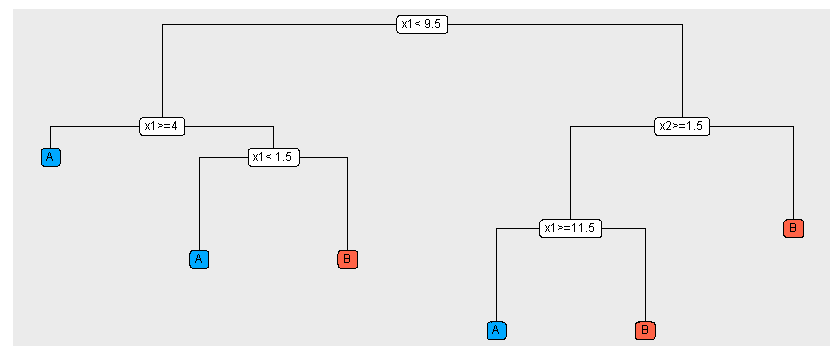

In [7]:
model = rpart(class ~ x1+x2, data, method="class", minsplit=2, cp=0, maxdepth=30)

model
ggtree(model)

Applying the split criteria to the new observation [ x1=8, x2=3 ], we see that (8 < 9.5) & (8 ≥ 4) so we choose the first terminal split and predict that the new observation is in class A.  (Note that we predict with 100% certainty, at least according to this particular method.)

In [8]:
cbind(new, class.predicted="A") %>% caption("new")

x1,x2,class.predicted
8,3,A


### Find Best Splits

Now we look more closely at how to pick the split criteria.

#### Entropy

Entropy is a measure of uncertainty in a distribution.

Here is the definition of the entropy function H for a distribution of class labels A, B, ... :

$$
H = - \big[ P(A) \, log_2(P(A)) + P(B) \, log_2(P(B)) \, + \, ... \big]
$$

The entropy function for a distribution of 2 class labels A and B looks like this.  Note that maximum entropy corresponds to maximum uncertainty in the distribution, i.e., there is a 50% probability that a value in the distribution is A.  Minimum entropy corresponds to minimum uncertainty, i.e., there is either a 0% or 100% probability that a value in the distribution is A. 

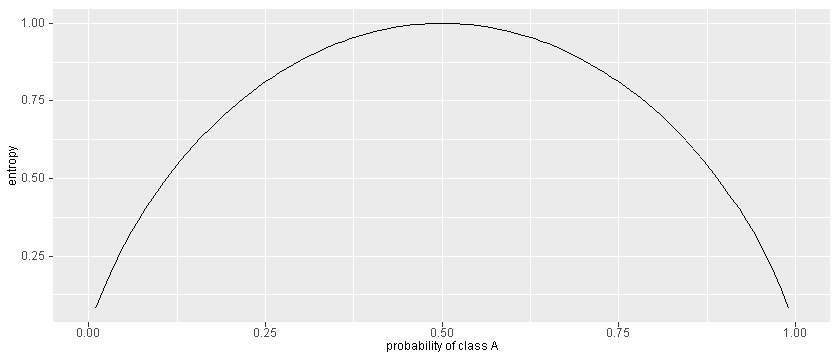

In [9]:
x = seq(0,1,0.01)
y = aaply(x, 1, function(i) -i*log2(i) + -(1-i)*log2(1-i) )
          
ggplot() + xlab("probability of class A") + ylab("entropy") + geom_line(aes(x=x, y=y), color="black", na.rm=TRUE)

#### Method to Pick a Split Criterion

How to pick a dataset's (or split's) split criterion:

1. Calculate the entropy of the dataset's class distribution.
1. For each candidate split criterion ...
  * Determine the two splits.
  * Calculate the entropy of each split's class distribution.
  * Calculate the weighted average of split entropies.
  * Calculate the information gain associated with the candidate split criterion, where the information gain is the difference between the dataset's entropy and the weighted average of split entropies.
1. Pick the split criterion associated with the largest information gain.

The list of candidate split criteria should include all (non-class) variables and values that split the individual variable distributions every possible way.

#### Dataset & Associated Entropy

In this example, the entropy of the dataset's class distribution is 0.97. 

In [10]:
entropy.root = entropy(table(data$class), unit="log2")

row.arrange(data %>% captionx,
            entropy.root %>% fmt("entropy") %>% captionx("entropy_info.root"))

x1,x2,class
2,5,B
1,2,A
6,4,A
7,5,A
8,1,A
11,2,B
12,5,A
14,2,A
15,1,B
13,1,B


#### Candidate Split Criteria & Associated Entropies

Here are a few candidate split criteria.

A split at x1=9.5 would result in weighted average entropy 0.84 and information gain 0.12.

In [11]:
split_variable = "x1"
split_value = 9.5

data.left  = data[data[, split_variable] <   split_value,]
data.right = data[data[, split_variable] >=  split_value,]

prob_info.left  = data.frame(table(data.left$class));  names(prob_info.left)  = c("class", "prob"); prob_info.left$prob  = prob_info.left$prob/sum(prob_info.left$prob)
prob_info.right = data.frame(table(data.right$class)); names(prob_info.right) = c("class", "prob"); prob_info.right$prob = prob_info.right$prob/sum(prob_info.right$prob)

entropy.left  = entropy(table(data.left$class),  unit="log2")
entropy.right = entropy(table(data.right$class), unit="log2")
weight.left = nrow(data.left) / (nrow(data.left) + nrow(data.right))
weight.right = nrow(data.right) / (nrow(data.left) + nrow(data.right))

entropy_info.left  = data.frame(entropy=entropy.left,  weight=weight.left)
entropy_info.right = data.frame(entropy=entropy.right, weight=weight.right)

entropy.children = weight.left*entropy.left + weight.right*entropy.right

info_gain_x1_9.5 = entropy.root - entropy.children

data.frame(split_variable, split_value, entropy.root, entropy.children, info_gain=info_gain_x1_9.5)
row.arrange(data.left  %>% captionx, prob_info.left %>% captionx, entropy_info.left %>% fmt %>% captionx("entropy_info.left"))
row.arrange(data.right %>% captionx, prob_info.right %>% captionx, entropy_info.right %>% fmt %>% captionx("entropy_info.right"))

split_variable,split_value,entropy.root,entropy.children,info_gain
x1,9.5,0.9709506,0.8464393,0.1245112


data.left 
 
 
 x1 
 x2 
 class 
 
 
 
 
 2 
 5 
 B 
 
 
 1 
 2 
 A 
 
 
 6 
 4 
 A 
 
 
 7 
 5 
 A 
 
 
 8 
 1 
 A 
 
 
 
 prob_info.left 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.8 
 
 
 B 
 0.2 
 
 
 
 entropy_info.left 
 
 
 entropy 
 weight 
 
 
 
 
 0.7219281 
 0.5

data.right 
 
 
 x1 
 x2 
 class 
 
 
 
 
 11 
 2 
 B 
 
 
 12 
 5 
 A 
 
 
 14 
 2 
 A 
 
 
 15 
 1 
 B 
 
 
 13 
 1 
 B 
 
 
 
 prob_info.right 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.4 
 
 
 B 
 0.6 
 
 
 
 entropy_info.right 
 
 
 entropy 
 weight 
 
 
 
 
 0.9709506 
 0.5

A split at x1=7.5 would result in weighted average entropy 0.92 and information gain 0.046.

In [12]:
split_variable = "x1"
split_value = 7.5

data.left  = data[data[, split_variable] <   split_value,]
data.right = data[data[, split_variable] >=  split_value,]

prob_info.left  = data.frame(table(data.left$class));  names(prob_info.left)  = c("class", "prob"); prob_info.left$prob  = prob_info.left$prob/sum(prob_info.left$prob)
prob_info.right = data.frame(table(data.right$class)); names(prob_info.right) = c("class", "prob"); prob_info.right$prob = prob_info.right$prob/sum(prob_info.right$prob)

entropy.left  = entropy(table(data.left$class),  unit="log2")
entropy.right = entropy(table(data.right$class), unit="log2")
weight.left = nrow(data.left) / (nrow(data.left) + nrow(data.right))
weight.right = nrow(data.right) / (nrow(data.left) + nrow(data.right))

entropy_info.left  = data.frame(entropy=entropy.left,  weight=weight.left)
entropy_info.right = data.frame(entropy=entropy.right, weight=weight.right)

entropy.children = weight.left*entropy.left + weight.right*entropy.right

info_gain_x1_7.5 = entropy.root - entropy.children

data.frame(split_variable, split_value, entropy.root, entropy.children, info_gain=info_gain_x1_7.5)
row.arrange(data.left  %>% captionx, prob_info.left %>% captionx, entropy_info.left %>% fmt %>% captionx("entropy_info.left"))
row.arrange(data.right %>% captionx, prob_info.right %>% captionx, entropy_info.right %>% fmt %>% captionx("entropy_info.right"))

split_variable,split_value,entropy.root,entropy.children,info_gain
x1,7.5,0.9709506,0.9245112,0.04643934


data.left 
 
 
 x1 
 x2 
 class 
 
 
 
 
 2 
 5 
 B 
 
 
 1 
 2 
 A 
 
 
 6 
 4 
 A 
 
 
 7 
 5 
 A 
 
 
 
 prob_info.left 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.75 
 
 
 B 
 0.25 
 
 
 
 entropy_info.left 
 
 
 entropy 
 weight 
 
 
 
 
 0.8112781 
 0.4

data.right 
 
 
 x1 
 x2 
 class 
 
 
 
 
 8 
 1 
 A 
 
 
 11 
 2 
 B 
 
 
 12 
 5 
 A 
 
 
 14 
 2 
 A 
 
 
 15 
 1 
 B 
 
 
 13 
 1 
 B 
 
 
 
 prob_info.right 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.5 
 
 
 B 
 0.5 
 
 
 
 entropy_info.right 
 
 
 entropy 
 weight 
 
 
 
 
 1 
 0.6

A split at x2=4.5 would result in weighted average entropy 0.97 and information gain 0.0058.

In [13]:
split_variable = "x2"
split_value = 4.5

data.left  = data[data[, split_variable] <   split_value,]
data.right = data[data[, split_variable] >=  split_value,]

prob_info.left  = data.frame(table(data.left$class));  names(prob_info.left)  = c("class", "prob"); prob_info.left$prob  = prob_info.left$prob/sum(prob_info.left$prob)
prob_info.right = data.frame(table(data.right$class)); names(prob_info.right) = c("class", "prob"); prob_info.right$prob = prob_info.right$prob/sum(prob_info.right$prob)

entropy.left  = entropy(table(data.left$class),  unit="log2")
entropy.right = entropy(table(data.right$class), unit="log2")
weight.left = nrow(data.left) / (nrow(data.left) + nrow(data.right))
weight.right = nrow(data.right) / (nrow(data.left) + nrow(data.right))

entropy_info.left  = data.frame(entropy=entropy.left,  weight=weight.left)
entropy_info.right = data.frame(entropy=entropy.right, weight=weight.right)

entropy.children = weight.left*entropy.left + weight.right*entropy.right

info_gain_x2_4.5 = entropy.root - entropy.children

data.frame(split_variable, split_value, entropy.root, entropy.children, info_gain=info_gain_x2_4.5)
row.arrange(data.left  %>% captionx, prob_info.left %>% captionx, entropy_info.left %>% fmt %>% captionx("entropy_info.left"))
row.arrange(data.right %>% captionx, prob_info.right %>% captionx, entropy_info.right %>% fmt %>% captionx("entropy_info.right"))

split_variable,split_value,entropy.root,entropy.children,info_gain
x2,4.5,0.9709506,0.9651484,0.005802149


data.left 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1 
 2 
 A 
 
 
 6 
 4 
 A 
 
 
 8 
 1 
 A 
 
 
 11 
 2 
 B 
 
 
 14 
 2 
 A 
 
 
 15 
 1 
 B 
 
 
 13 
 1 
 B 
 
 
 
 prob_info.left 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.5714286 
 
 
 B 
 0.4285714 
 
 
 
 entropy_info.left 
 
 
 entropy 
 weight 
 
 
 
 
 0.9852281 
 0.7

data.right 
 
 
 x1 
 x2 
 class 
 
 
 
 
 2 
 5 
 B 
 
 
 7 
 5 
 A 
 
 
 12 
 5 
 A 
 
 
 
 prob_info.right 
 
 
 class 
 prob 
 
 
 
 
 A 
 0.6666667 
 
 
 B 
 0.3333333 
 
 
 
 entropy_info.right 
 
 
 entropy 
 weight 
 
 
 
 
 0.9182958 
 0.3

The best split criterion among these 3 candidates and all other candidates is x1 < 9.5 because its associated information gain 0.12 is largest.

In [14]:
data.frame(x1_9.5=info_gain_x1_9.5, x1_7.5=info_gain_x1_7.5, x2_4.5=info_gain_x2_4.5, others="some values") %>% caption("information gain")

x1_9.5,x1_7.5,x2_4.5,others
0.1245112,0.0464393,0.0058021,some values


We pick split criteria for the subsequent splits similarly.

### Pruning

A decision tree model constructed by fully recursively splitting as much as possible tends to overfit.  To address this problem, you can restrict splitting - effectively pruning some branches off the tree - leaving terminal splits that comprise not single classes, but rather multiple classes. There are many popular pruning methods.

#### Prune by Maximum Depth

In this example, we split only as far as a specified maximum depth 2.

n= 10 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 10 4 A (0.6000000 0.4000000)  
  2) x1< 9.5 5 1 A (0.8000000 0.2000000) *
  3) x1>=9.5 5 2 B (0.4000000 0.6000000)  
    6) x2>=1.5 3 1 A (0.6666667 0.3333333) *
    7) x2< 1.5 2 0 B (0.0000000 1.0000000) *

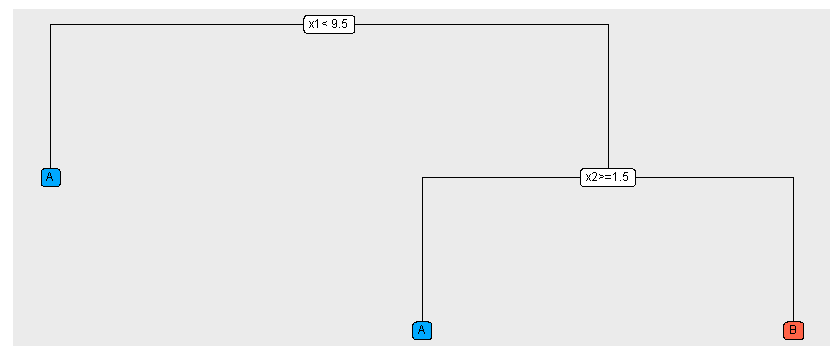

In [15]:
model = rpart(class ~ x1+x2, data, method="class", minsplit=2, cp=0, maxdepth=2)

model
ggtree(model)

#### Prune by Maximum Complexity

In this example, we split only if the resultant model with splits improves performance by more than 20%. 

n= 10 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 10 4 A (0.6000000 0.4000000)  
   2) x1< 9.5 5 1 A (0.8000000 0.2000000) *
   3) x1>=9.5 5 2 B (0.4000000 0.6000000)  
     6) x2>=1.5 3 1 A (0.6666667 0.3333333)  
      12) x1>=11.5 2 0 A (1.0000000 0.0000000) *
      13) x1< 11.5 1 0 B (0.0000000 1.0000000) *
     7) x2< 1.5 2 0 B (0.0000000 1.0000000) *

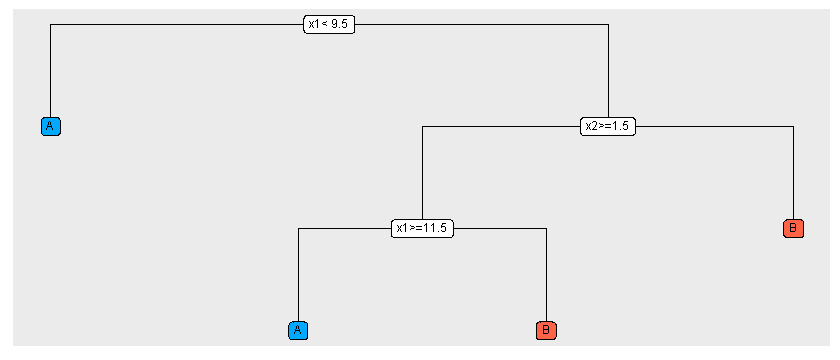

In [16]:
model = rpart(class ~ x1+x2, data, method="class", minsplit=2, cp=0.2, maxdepth=30)

model
ggtree(model)

#### Prune by Minimum Split Size

In this example, we split only if the dataset (or split) comprises at least 4 observations.

n= 10 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 10 4 A (0.6000000 0.4000000)  
  2) x1< 9.5 5 1 A (0.8000000 0.2000000) *
  3) x1>=9.5 5 2 B (0.4000000 0.6000000)  
    6) x2>=1.5 3 1 A (0.6666667 0.3333333) *
    7) x2< 1.5 2 0 B (0.0000000 1.0000000) *

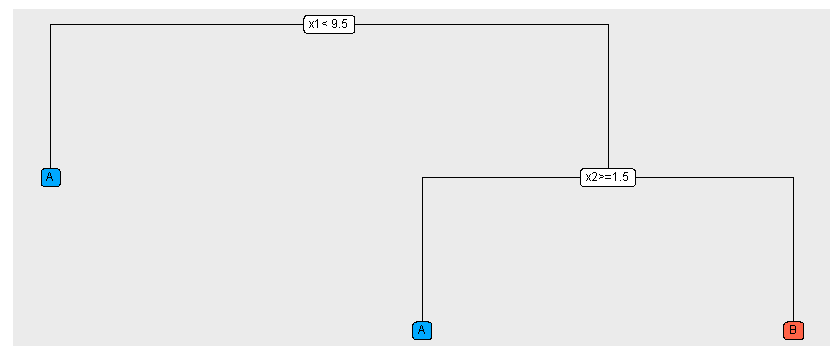

In [17]:
model = rpart(class ~ x1+x2, data, method="class", minsplit=4, cp=0, maxdepth=30)

model
ggtree(model)

#### Prune by Minimum Number of Observations per Leaf Node

In this observation, we split only if it does not result in a leaf node comprising fewer than 3 observations.

n= 10 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 10 4 A (0.6000000 0.4000000)  
  2) x1< 9.5 5 1 A (0.8000000 0.2000000) *
  3) x1>=9.5 5 2 B (0.4000000 0.6000000) *

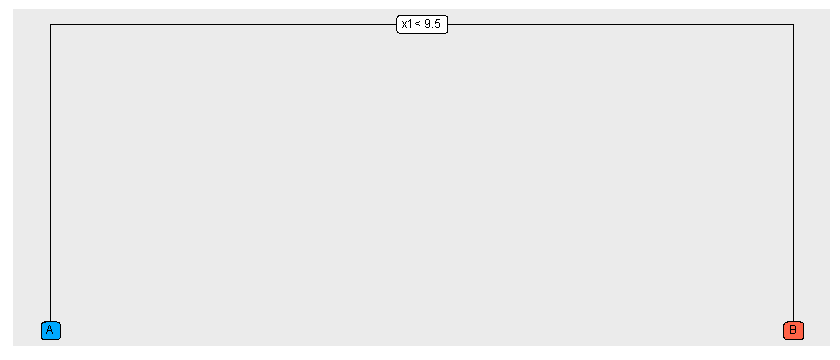

In [18]:
model = rpart(class ~ x1+x2, data, method="class", minsplit=2, cp=0, maxdepth=30, minbucket=3)

model
ggtree(model)

#### Prune by Minimum Information Gain

You can split only if information gain exceeds a specified threshold.

## Code

### Useful Functions

In [19]:
# help(dendro_data, package="ggdendro")
# help(rpart, package="rpart")
# help(predict.rpart, package=rpart) # use predict to call this function 

### Templates

n= 24 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 24 9 B (0.3750000 0.6250000)  
   2) x2< 7.5 15 6 A (0.6000000 0.4000000)  
     4) x1>=2.5 13 4 A (0.6923077 0.3076923)  
       8) x1< 5.5 6 0 A (1.0000000 0.0000000) *
       9) x1>=5.5 7 3 B (0.4285714 0.5714286)  
        18) x2>=6.5 2 0 A (1.0000000 0.0000000) *
        19) x2< 6.5 5 1 B (0.2000000 0.8000000)  
          38) x1>=29 1 0 A (1.0000000 0.0000000) *
          39) x1< 29 4 0 B (0.0000000 1.0000000) *
     5) x1< 2.5 2 0 B (0.0000000 1.0000000) *
   3) x2>=7.5 9 0 B (0.0000000 1.0000000) *

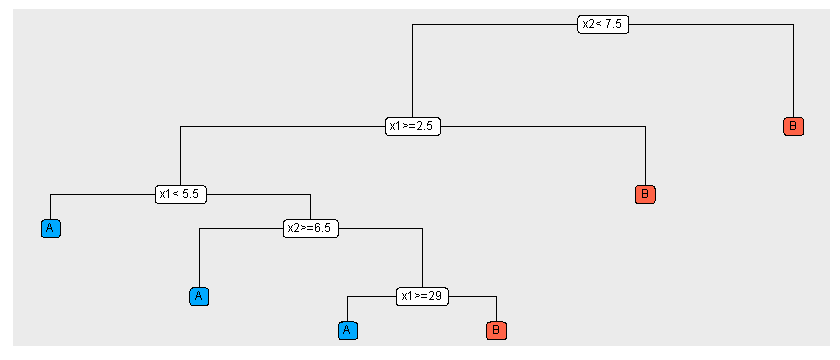

In [20]:
data.train = data.frame(x1=c(10,2,31,4,10,6,7,8,10,2,3,4,5,6,7,8,10,2,3,42,5,16,7,8), x2=c(10,21,31,4,5,6,7,8,9,7,6,5,4,13,2,10,10,2,3,4,5,6,7,81), x3=c(5,4,13,2,10,10,2,3,5,4,13,2,1,1,2,3,1,1,2,20,3,3,4,4), class=c("B", "B", "B", "A", "B", "B", "A", "B", "B", "B", "A", "A", "A", "B", "B", "B", "B", "B", "A", "A", "A", "B", "A", "B"))

mymodel = rpart(class ~ x1+x2+x3, data.train, method="class", minsplit=2, cp=0, maxdepth=30)

mymodel
ggtree(mymodel)

In [21]:
data.train = data.frame(x1=c(10,2,31,4,10,6,7,8,10,2,3,4,5,6,7,8,10,2,3,42,5,16,7,8), x2=c(10,21,31,4,5,6,7,8,9,7,6,5,4,13,2,10,10,2,3,4,5,6,7,81), x3=c(5,4,13,2,10,10,2,3,5,4,13,2,1,1,2,3,1,1,2,20,3,3,4,4), class=c("B", "B", "B", "A", "B", "B", "A", "B", "B", "B", "A", "A", "A", "B", "B", "B", "B", "B", "A", "A", "A", "B", "A", "B"))
data.new = data.frame(x1=c(5,3,7,8), x2=c(8,7,4,4), x3=c(1,5,2,6))
cutoff = 0.6

mymodel = rpart(class ~ x1+x2+x3, data.train, method="class", minsplit=2, cp=0, maxdepth=30)

prob = predict(mymodel, data.new, type="prob")
prediction = as.class(prob, class="A", cutoff) # based on probability that exceeds cutoff

prob %>% caption
prediction %>% fmt
cbind(data.new, prediction)

A,B
0,1
1,0
0,1
0,1


prediction
B
A
B
B


x1,x2,x3,prediction
5,8,1,B
3,7,5,A
7,4,2,B
8,4,6,B


### Expectations

Know about this:
* how to build a decision tree model based on classified data, and use it to predict the classes of new observations, using R's `rpart` and `predict` functions


### Further Reading

* https://www.rdocumentation.org/packages/rpart/versions/4.1-12/topics/rpart
* https://cran.r-project.org/web/packages/ggdendro/vignettes/ggdendro.html
* https://www.rdocumentation.org/packages/kknn/versions/1.3.1/topics/kknn
* https://www.statmethods.net/advstats/cart.html
* https://www.statmethods.net/advstats/glm.html

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised September 20, 2019
</span>
</p>